# eval_bml

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from spotRiver.evaluation.eval_bml import eval_bml_horizon, eval_bml_landmark, eval_bml_window, eval_oml_horizon

model = LinearRegression()

X_train = list(range(10))
y_train = [2*x for x in X_train]

X_test = list(range(10, 20))
y_test = [x for x in X_test]

train = pd.DataFrame(X_train, columns=["x1"])
train["y"] = y_train

test = pd.DataFrame(X_test, columns=["x1"])
test["y"] = y_test

target_column = "y"
horizon = 1
df_eval , df_true = eval_bml_horizon(model , train , test , target_column, horizon)
print (df_eval )
print (df_true )

    RMSE   MAE  AbsDiff  Underestimation  Overestimation  MaxResidual  \
0    NaN   NaN      NaN              NaN             NaN          NaN   
1   10.0  10.0     10.0              0.0            10.0         10.0   
2   11.0  11.0     11.0              0.0            11.0         11.0   
3   12.0  12.0     12.0              0.0            12.0         12.0   
4   13.0  13.0     13.0              0.0            13.0         13.0   
5   14.0  14.0     14.0              0.0            14.0         14.0   
6   15.0  15.0     15.0              0.0            15.0         15.0   
7   16.0  16.0     16.0              0.0            16.0         16.0   
8   17.0  17.0     17.0              0.0            17.0         17.0   
9   18.0  18.0     18.0              0.0            18.0         18.0   
10  19.0  19.0     19.0              0.0            19.0         19.0   

    Memory (MB)  CompTime (s)  
0      0.130468      0.002286  
1      0.011773      0.001082  
2      0.006539      0.0010

# eval_bml_landmark

In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from spotRiver.evaluation.eval_bml import eval_bml_landmark

model = LinearRegression()

X_train = list(range(10))
y_train = [2*x for x in X_train]

X_test = list(range(10, 20))
y_test = [x for x in X_test]

train = pd.DataFrame(X_train, columns=["x1"])
train["y"] = y_train

test = pd.DataFrame(X_test, columns=["x1"])
test["y"] = y_test

target_column = "y"
horizon = 1
df_eval , df_true = eval_bml_landmark(model , train , test , target_column, horizon)
print (df_eval )
print (df_true )

     RMSE    MAE  AbsDiff  Underestimation  Overestimation  MaxResidual  \
0     NaN    NaN      NaN              NaN             NaN          NaN   
1   10.00  10.00    10.00              0.0           10.00        10.00   
2    7.36   7.36     7.36              0.0            7.36         7.36   
3    5.45   5.45     5.45              0.0            5.45         5.45   
4    4.04   4.04     4.04              0.0            4.04         4.04   
5    2.97   2.97     2.97              0.0            2.97         2.97   
6    2.14   2.14     2.14              0.0            2.14         2.14   
7    1.50   1.50     1.50              0.0            1.50         1.50   
8    0.99   0.99     0.99              0.0            0.99         0.99   
9    0.59   0.59     0.59              0.0            0.59         0.59   
10   0.26   0.26     0.26              0.0            0.26         0.26   

    Memory (MB)  CompTime (s)  
0      0.015151      0.002217  
1      0.017168      0.003135  
2  

# eval_bml_window

In [3]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from spotRiver.evaluation.eval_bml import eval_bml_window

model = LinearRegression()

X_train = list(range(10))
y_train = [2*x for x in X_train]

X_test = list(range(10, 20))
y_test = [x for x in X_test]

train = pd.DataFrame(X_train, columns=["x1"])
train["y"] = y_train

test = pd.DataFrame(X_test, columns=["x1"])
test["y"] = y_test

target_column = "y"
horizon = 1
df_eval , df_true = eval_bml_window(model , train , test , target_column, horizon)
print (df_eval )
print (df_true )

     RMSE    MAE  AbsDiff  Underestimation  Overestimation  MaxResidual  \
0     NaN    NaN      NaN              NaN             NaN          NaN   
1   10.00  10.00    10.00             0.00           10.00        10.00   
2    7.00   7.00     7.00             0.00            7.00         7.00   
3    4.27   4.27     4.27             0.00            4.27         4.27   
4    1.87   1.87     1.87             0.00            1.87         1.87   
5    0.13   0.13     0.13             0.13            0.00         0.13   
6    1.67   1.67     1.67             1.67            0.00         1.67   
7    2.67   2.67     2.67             2.67            0.00         2.67   
8    3.07   3.07     3.07             3.07            0.00         3.07   
9    2.80   2.80     2.80             2.80            0.00         2.80   
10   1.80   1.80     1.80             1.80            0.00         1.80   

    Memory (MB)  CompTime (s)  
0      0.013930      0.002346  
1      0.014606      0.003190  
2  

# eval_oml_horizon

In [4]:
import pandas as pd
import numpy as np
from river import linear_model
from river import preprocessing,datasets
model = preprocessing.StandardScaler() | linear_model.LinearRegression()
X_train = list(range(10))
y_train = [2*x for x in X_train]
X_test = list(range(10, 20))
y_test = [x for x in X_test]
train = pd.DataFrame(X_train, columns=["x1"])
train["y"] = y_train
test = pd.DataFrame(X_test, columns=["x1"])
test["y"] = y_test
target_column = "y"
horizon = 1
df_eval, df_preds = eval_oml_horizon(model, train, test, target_column, horizon)
print(df_eval)
print(df_preds)

     RMSE    MAE  AbsDiff  Underestimation  Overestimation  MaxResidual  \
0     NaN    NaN      NaN              NaN             NaN          NaN   
1    9.64   9.64     9.64             9.64             0.0         9.64   
2   10.21  10.21    10.21            10.21             0.0        10.21   
3   10.65  10.65    10.65            10.65             0.0        10.65   
4   11.00  11.00    11.00            11.00             0.0        11.00   
5   11.29  11.29    11.29            11.29             0.0        11.29   
6   11.53  11.53    11.53            11.53             0.0        11.53   
7   11.73  11.73    11.73            11.73             0.0        11.73   
8   11.91  11.91    11.91            11.91             0.0        11.91   
9   12.05  12.05    12.05            12.05             0.0        12.05   
10  12.18  12.18    12.18            12.18             0.0        12.18   

    Memory (MB)  CompTime (s)  
0      0.021872      0.000246  
1      0.005562      0.000121  
2  

In [5]:
from river import linear_model, datasets, preprocessing
from spotRiver.evaluation.eval_bml import eval_oml_horizon
from spotRiver.utils.data_conversion import convert_to_df
model = preprocessing.StandardScaler() | linear_model.LinearRegression()
dataset = datasets.TrumpApproval()
target_column = "Approve"
df = convert_to_df(dataset, target_column)
train = df[:500]
test = df[500:]
horizon = 1
df_eval, df_preds = eval_oml_horizon(model, train, test, target_column, horizon)

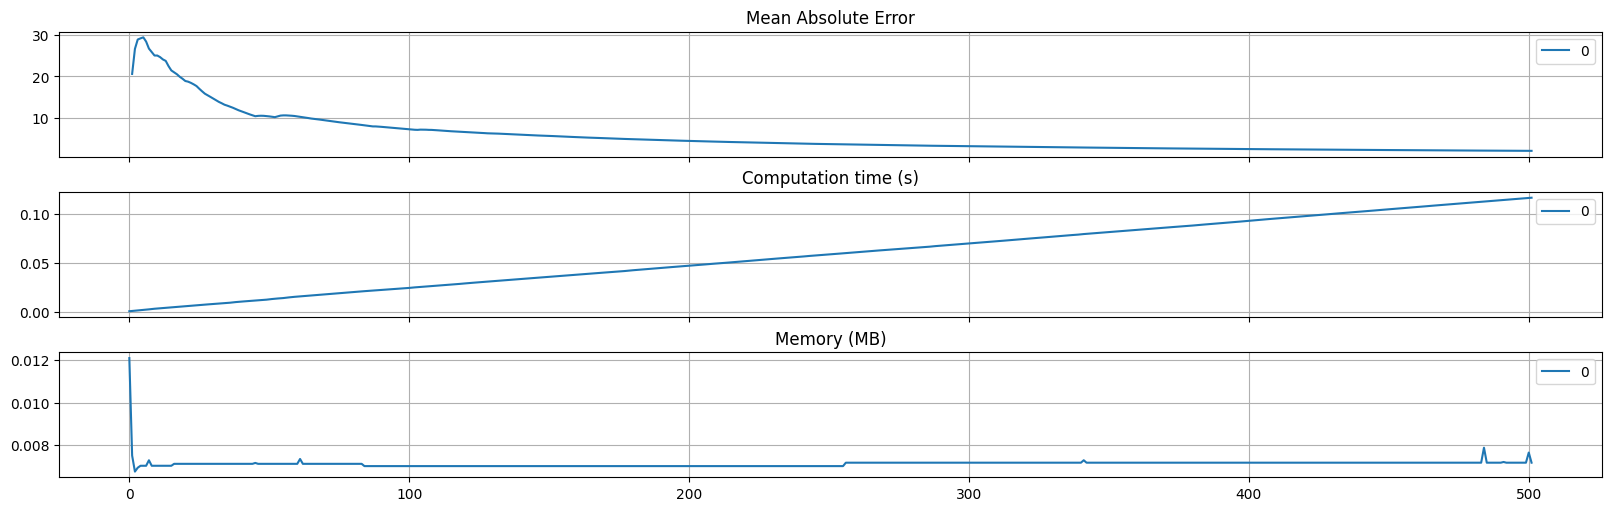

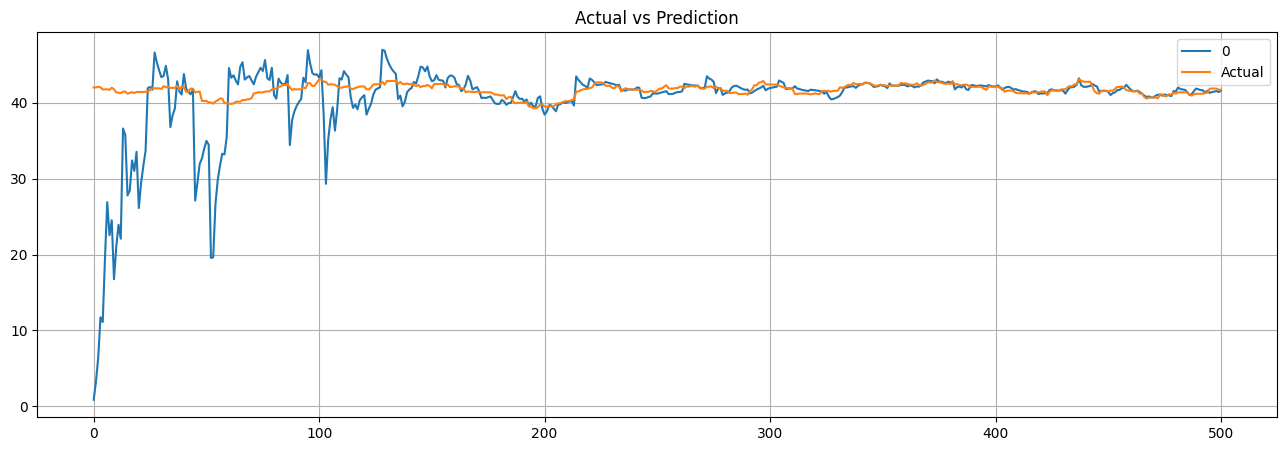

In [6]:
from spotRiver.evaluation.eval_bml import plot_bml_oml_horizon_metrics, plot_bml_oml_horizon_predictions
plot_bml_oml_horizon_metrics(df_eval)
plot_bml_oml_horizon_predictions(df_preds, target_column=target_column)

In [7]:
df_eval

,RMSE,MAE,AbsDiff,Underestimation,Overestimation,MaxResidual,Memory (MB),CompTime (s)
0,NaN,NaN,NaN,NaN,NaN,NaN,0.012100,0.000405
1,41.19,41.19,41.19,41.19,0.0,41.19,0.007507,0.000236
2,38.78,38.78,38.78,38.78,0.0,38.78,0.006752,0.000244
3,35.73,35.73,35.73,35.73,0.0,35.73,0.006935,0.000333
4,30.33,30.33,30.33,30.33,0.0,30.33,0.007027,0.000253
...,...,...,...,...,...,...,...,...
497,0.47,0.47,0.47,0.47,0.0,0.47,0.007172,0.000209
498,0.40,0.40,0.40,0.40,0.0,0.40,0.007172,0.000211
499,0.34,0.34,0.34,0.34,0.0,0.34,0.007172,0.000323
500,0.30,0.30,0.30,0.30,0.0,0.30,0.007649,0.000241


# eval_oml_iter_progressive

In [10]:
from river import datasets
from spotRiver.evaluation.eval_oml import eval_oml_iter_progressive, plot_oml_iter_progressive
from river import metrics as river_metrics
from river import tree as river_tree
from river import preprocessing as river_preprocessing
dataset = datasets.TrumpApproval()

In [11]:
model =  (river_preprocessing.StandardScaler() | river_tree.HoeffdingAdaptiveTreeRegressor(seed=1))

res_num = eval_oml_iter_progressive(
    dataset = list(dataset),
    step = 1,
    metric = river_metrics.MAE(),
    models =
    {
        "HATR": model,
    }
)

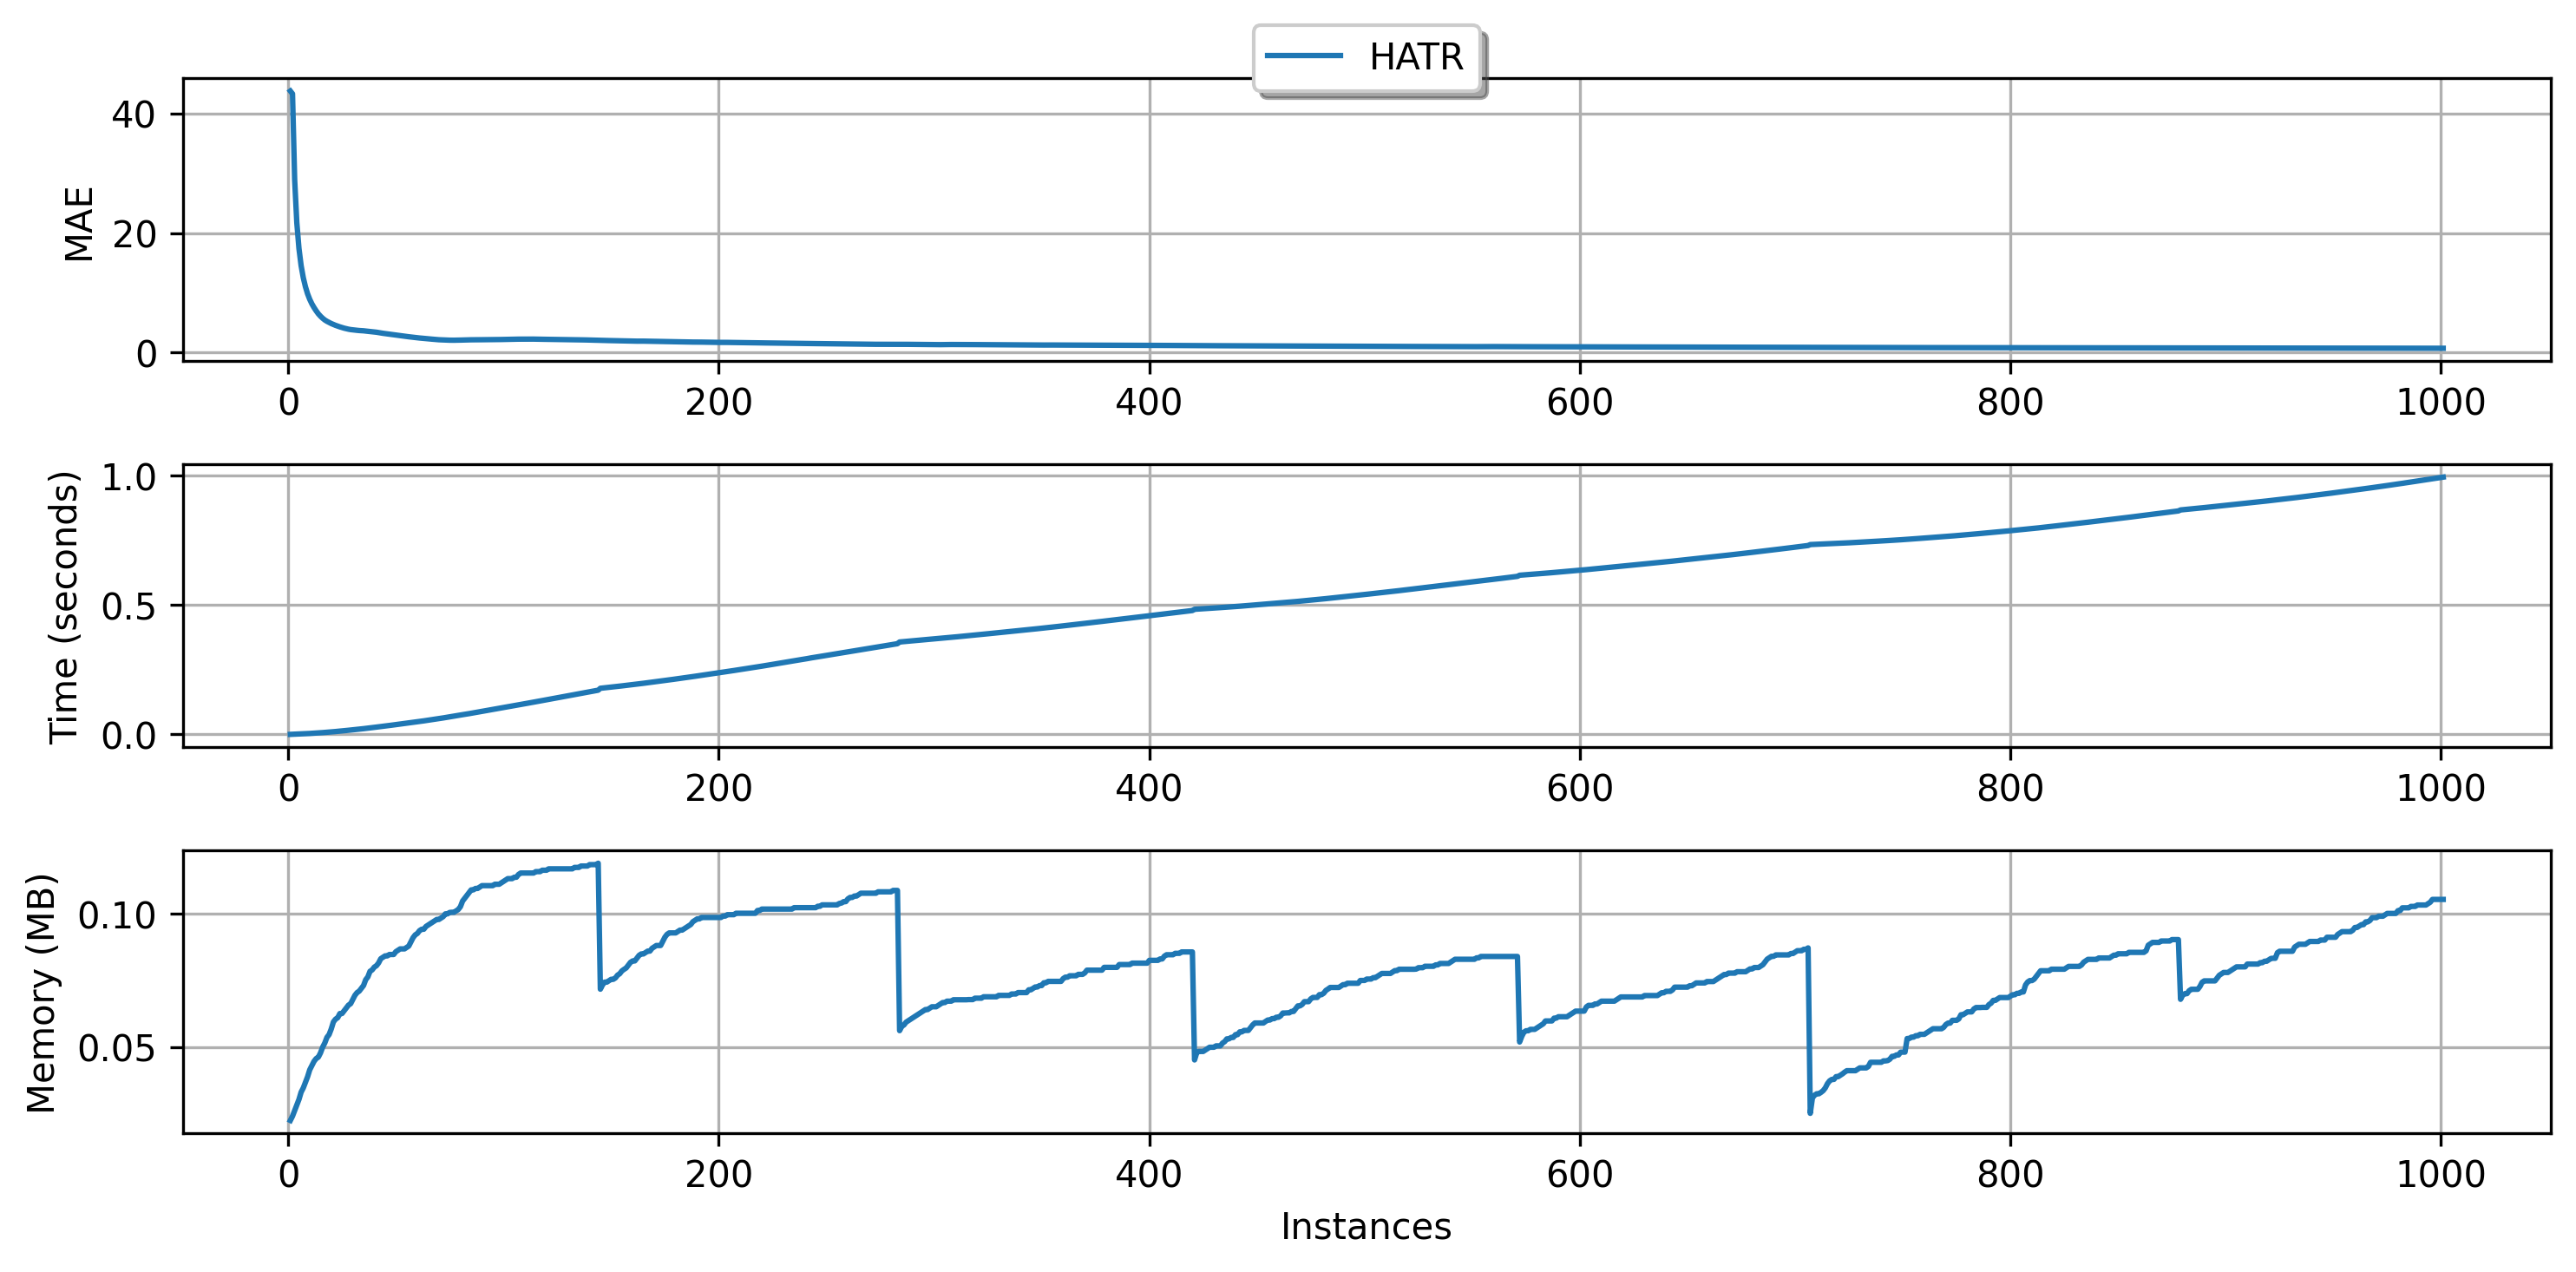

In [12]:
plot_oml_iter_progressive(res_num)

In [5]:
import numpy as np
np.arange(100) // 7

array([ 0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,
        2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,
        4,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  7,  7,
        7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,
        9,  9, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 12,
       12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 14, 14])

In [7]:
np.arange(100) % 7

array([0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0,
       1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1,
       2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2,
       3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3,
       4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1])

In [9]:
100 % 3

1

In [10]:
arr = np.arange(100) // 7
# Remove the last two entries
rem = 100 % 7
arr = arr[:-rem]

In [11]:
arr

array([ 0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,
        2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,
        4,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  7,  7,
        7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,
        9,  9, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 12,
       12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13])